<a href="https://colab.research.google.com/github/Hayltons/DSWP/blob/master/Notebooks/NB02__Numpy_hs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b><i>NUMPY</i></b></h1></center>

> NumPy é um pacote para computação científica e álgebra linear para Python.



# **AGENDA**:
> Neste capítulo, vamos abordar os seguintes assuntos:

* NumPy
* Criar arrays
* Criar Arrays Multidimensionais
* Selecionar itens
* Aplicar funções como max(), min() e etc
* Calcular Estatísticas Descritivas: média e variância
* Reshaping
* Tansposta de um array
* Autovalores e Autovetores
* Wrap Up
* Exercícios

___
# **NOTAS E OBSERVAÇÕES**

* Nosso foco com o NumPy é facilitar o uso do Pandas;

___
# **CHEETSHEET**

![Numpy](https://github.com/MathMachado/Materials/blob/master/numpy_basics-1.png?raw=true)

# **ESCALAR, VETORES, MATRIZES E TENSORES**

![Tensor](https://github.com/MathMachado/Materials/blob/master/tensor.png?raw=true)

Source: [PyTorch for Deep Learning: A Quick Guide for Starters](https://towardsdatascience.com/pytorch-for-deep-learning-a-quick-guide-for-starters-5b60d2dbb564)

## Import Statement - Primeiros exemplos
> Como exemplo, considere gerar uma amostra aleatória de tamanho 10 da Distribuição Normal(0, 1):

## Importar a library NumPy

### **Opção 1**: Importar a biblioteca NumPy COM alias

In [ ]:
import numpy as np

In [ ]:
# Set up o número de casas decimais para o NumPy:
np.set_printoptions(precision = 2, suppress = True)

'''
Define seed por questões de reproducibilidade, ou seja, 
garante que todos vamos gerar os mesmos números aleatórios
'''
np.random.seed(seed = 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(media, desvio_padrao)
media = 0
desvio_padrao = 1
a_numeros1 = np.random.normal(media, desvio_padrao, size = 10) # Array 1D de size = 10
a_numeros1

**Observação**: Altere o valor de [precision] para 4, 2 e 0 e observe o que acontece.

### **Opção 2**: Importar a biblioteca NumPy SEM alias

In [ ]:
import numpy

In [ ]:
# Set up o número de casas decimais para o NumPy:
numpy.set_printoptions(precision = 2, suppress = True)

'''
Define seed por questões de reproducibilidade, ou seja, 
garante que todos vamos gerar os mesmos números aleatórios
'''
numpy.random.seed(seed = 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(mu, desvio_padrao)
media = 0
desvio_padrao = 1
numpy.random.normal(size = 10)

### **Opção 3**: Importar funções específicas da biblioteca NumPy

In [ ]:
from numpy import set_printoptions
from numpy.random import seed, normal

In [ ]:
# Set up o número de casas decimais para o NumPy:
set_printoptions(precision = 2, suppress = True)

'''
Define seed por questões de reproducibilidade, ou seja, 
garante que todos vamos gerar os mesmos números aleatórios
'''
seed(seed = 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(mu, desvio_padrao)
media = 0
desvio_padrao = 1 
np.random.normal(size = 10)

___
# **Estatísticas Descriticas com NumPy**

## Exemplo 1
> Vamos voltar ao mesmo exemplo anterior, mas desta vez, usando a opção 1 (com alias):

* Gerar uma amostra aleatória de tamanho 10 da Distribuiçao Normal(0, 1).

In [ ]:
# Set up o número de casas decimais para o NumPy:
np.set_printoptions(precision = 2, suppress = True)

# Define seed
np.random.seed(seed = 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(media, desvio_padrao)
media = 0
desvio_padrao = 1

np.random
a_numeros1 = np.random.normal(media, desvio_padrao, size = 10) # Array 1D de size = 10
a_numeros1

Conferindo a média e desvio-padrão do array gerado:

In [ ]:
f'Distribuição N({np.mean(a_numeros1)}, {np.std(a_numeros1)})'

Estávamos à espera de media = 0 e sigma = 1. Certo? Porque isso não aconteceu?

## **Laboratório 1**
> Altere os valores de [size] para 100, 1.000, 10.000, 100.000 e 1.000.000 e relate o que acontece com a média e desvio padrão.

## **Minha solução**

In [ ]:
# Define a média e o desvio-padrão
media = 0
desvio_padrao = 1

# Define seed
np.random.seed(seed = 20111974)
l_lista_numeros = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

for i_size in l_lista_numeros:
    a_numeros1 = np.random.normal(media, desvio_padrao, size = i_size)
    print(f'Size: {i_size}--> Distribuição: N({np.mean(a_numeros1)}, {np.std(a_numeros1)})')

Com relação à Distribuição Normal($\mu, \sigma$), temos que:

![NormalDistribution](https://github.com/MathMachado/Materials/blob/master/NormalDistribution.PNG?raw=true)

Fonte: [Normal Distribution](https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2)

## Lei Forte dos Grandes Números - LFGN
> Por favor, leia o que diz a [Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers). --> 3 minutos.

* O que você aprendeu com isso?

## Exemplo 2
> Vamos nos aprofundar um pouco mais no que diz a LFGN. Para isso, vamos simular o lançamento de dados. Como sabemos, os dados possuem 6 lados numerados de 1 a 6, com igual probabilidade. Certo?

A LFGN nos diz que à medida que N (o tamanho da amostra ou número de dados) cresce, então a média dos dados converge para o valor esperado. Isso quer dizer que:

$$\frac{1+2+3+4+5+6}{6}= \frac{21}{6}= 3,5$$

Ou seja, à medida que N (o tamanho da amostra) cresce, espera-se que a média dos dados se aproxime de 3,5. Ok?

Vamos ver se isso é verdade...

Vamos usar o método np.random.randint (= função randint definido na classe np.random), a seguir:

O que significa ou qual é a interpretação do resultado abaixo?

In [ ]:
# Define seed
import numpy as np
np.random.seed(seed = 20111974)

# Simular 100 lançamentos de um dado:
a_dados_simulados = np.random.randint(1, 7, size = 100)
a_dados_simulados

In [ ]:
# Importar o pandas, pois vamos precisar do método pd.value_counts():
import pandas as pd
pd.value_counts(a_dados_simulados)

**Interpretação**: Isso quer dizer que fizemos a simulação de lançamento de um dado 100 vezes. Acima, a frequência com que cada lado do dado aparece.

Eu estava à espera de frequência igual para cada um dos lados, isto é, por volta dos 16 ou 17. Ou seja:

$$\frac{100}{6}= 16,66$$

Mas ok, vamos continuar com nosso experimento...

In [ ]:
# Definir a semente
np.random.seed(20111974)

for i_size in [10, 30, 50, 75, 100, 1000, 10000, 100000, 1000000]:
    a_dados_simulados = np.random.randint(1, 7, size = i_size)
    print(f'Size: {i_size} --> Média: {np.mean(a_dados_simulados)}')

E agora, como você interpreta esses resultados?

## Calcular percentis
> Boxplot

![BoxPlot](https://github.com/MathMachado/Materials/blob/master/boxplot.png?raw=true)

Considere o array de retornos (simulados) a seguir:

In [ ]:
import numpy as np
np.random.seed(20111974)

# Simulando Retornos de ativos financeiros com a distribuição Normal(0, 1):
a_retornos = np.random.normal(0, 1, 100)
print(f'Média: {np.mean(a_retornos)}')

In [ ]:
a_retornos

A seguir, o boxplot do array a_retornos:

In [ ]:
# Import da biblioteca seaborn: Uma das principais libraries para Data Visualization (outras: matplotlib)
import seaborn as sns

sns.boxplot(y = a_retornos)

In [ ]:
# Vamos usar o método np.percentile(array, q = [p1, p2, p3, ..., p99])
percentis = np.percentile(a_retornos, q = [1, 5, 25, 50, 55, 75, 99])

# Primeiro Quartil
q1 = percentis[2]

Em qual posição do array a_retornos se encontra Q3?

In [ ]:
q3 = percentis[5]

# ou de trás para a frente do conteúdo da lista:
q3_2 = percentis[-2]
print(q3, q3_2)

In [ ]:
# lim_inferior e lim_superior para detecção de outliers
lim_inferior = q1 - 1.5 * (q3 - q1)
lim_superior = q3 + 1.5 * (q3 - q1)

In [ ]:
f'Limite Inferior: {lim_inferior}; Limite Superior: {lim_superior}'

In [ ]:
np.min(a_retornos)

In [ ]:
np.max(a_retornos)

___
# **Ordenar itens de um array**
> Considere o array a seguir:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.random(10)
a_numeros1

Ordenando os itens de a_numeros1...

In [ ]:
np.sort(a_numeros1)

___
# **Obter ajuda**

In [ ]:
help(np.random.normal)

___
# **Criar arrays 1D**

In [ ]:
import numpy as np
np.set_printoptions(precision = 2, suppress = True)
np.random.seed(seed = 20111974)

Criar o array 1D a_numeros1, com os seguintes números:

In [ ]:
a_numeros1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a_numeros1

Qual a dimensão de a_numeros1?

In [ ]:
# Dimensão do array
a_numeros1.ndim

Qual o shape (dimensão) do array a_numeros1?

In [ ]:
# Números de itens no array
a_numeros1.shape

O array a_numeros1 poderia ter sido criado usando a função np.arange(inicio, fim, step):

In [ ]:
# Lembre-se que o número 10 é exclusive.
a_numeros2 = np.arange(start = 0, stop = 10, step = 1)

Outra alternativa seria usar np.linspace(start = 0, stop = 10, num = 9). Acompanhe a seguir:

In [ ]:
# Com np.linspace, o valor 9 é inclusive.
a_numeros3 = np.linspace(0, 9, 10)

Compare os resultados de a_numeros1, a_numeros2 e a_numeros3 a seguir:

In [ ]:
a_numeros1

In [ ]:
a_numeros2

In [ ]:
a_numeros3

Ou seja, a_numeros1 é igual a a_numeros2 que também é igual a a_numeros3. Ok?

**ATENÇÃO**: Observe que a sintaxe para criar a_numeros3 é ligeiramente diferente da sintaxe usada para criar a_numeros1 e a_numeros2. Abaixo, a sintaxe do comando np.linspace:

![](https://github.com/MathMachado/Materials/blob/master/linspace_sintaxe.PNG?raw=true)

Source: [HOW TO USE THE NUMPY LINSPACE FUNCTION](https://www.sharpsightlabs.com/blog/numpy-linspace/)

Soma 2 à cada item de a_numeros1:

In [ ]:
a_numeros1

In [ ]:
a_numeros2 = a_numeros1 + 2
a_numeros2

Multiplicar por 10 cada item de a_numeros1:

In [ ]:
a_numeros1 = a_numeros1*10
a_numeros1

___
# **Criar Arrays Multidimensionais**
> Ao criarmos, por exemplo, um array 2D, então a chamamos de matriz.

Criar o array com 2 linhas e 3 colunas usando números aleatórios:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.randn(2, 3)
a_numeros1

## Dimensão de um array
> Dimensão é o número de linhas e colunas da matriz.

In [ ]:
a_numeros1.shape

a_numeros1 é um array 2D (ou matriz), ou seja, 2 linhas, onde cada linha tem 3 elementos.

Criar um array com 3 linhas e 3 colunas:

In [ ]:
a_numeros2 = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
a_numeros2

In [ ]:
# Número de linhas e colunas de a_numeros1:
a_numeros1.shape

In [ ]:
# Número de linhas e colunas de a_numeros2
a_numeros2.shape

In [ ]:
# Somar 2 à cada elemento de a_numeros2
a_numeros2 = a_numeros2+2
a_numeros2

In [ ]:
# Multiplicar por 10 cada elemento de a_numeros2
a_numeros2 = a_numeros2*10
a_numeros2

___
# **Copiar arrays**
> Considere o array abaixo:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.randn(2, 3)
a_numeros1

Fazendo a cópia de a_numeros1...

In [ ]:
a_numeros1_copia = a_numeros1.copy()
a_numeros1_copia

___
# **Operações com arrays**
> Considere um array com temperaturas em Farenheit dado por:

In [ ]:
# Define a seed
np.random.seed(20111974)

a_temperatura_farenheit = np.array(np.random.randint(0, 100, 10))
a_temperatura_farenheit                                        

In [ ]:
type(a_temperatura_farenheit)

Transformando a temperatura Fahrenheit em Celsius...

In [ ]:
a_temperatura_celsius = 5*a_temperatura_farenheit/9 - 5*32/9
a_temperatura_celsius

In [ ]:
# O mesmo resultado, porém, escrito de forma diferente:
a_temperatura_celsius = (5/9)*a_temperatura_farenheit - (160/9)
a_temperatura_celsius

___
# **Selecionar itens**

In [ ]:
# Selecionar o segundo item de a_numeros1 (lembre-se que no Python arrays começam com indice = 0)
a_numeros1[1]

Dado a_numeros2 abaixo:

In [ ]:
a_numeros2

... selecionar o item da linha 2, coluna 3 do array a_numeros2:

In [ ]:
a_numeros2[1, 2]

In [ ]:
# Selecionar o último elemento de a_numeros1 --> Lembre-se que a_numeros1 é um array. Desta forma, teremos o último elemento do array!
a_numeros1[-1]

Veja...

In [ ]:
a_numeros1

In [ ]:
a_temperatura_celsius[-1]

___
# **Aplicar funções como max(), min() e etc**

In [ ]:
f'O máximo de a_numeros1 é: {np.max(a_numeros1)}'

In [ ]:
f'O mínimo de a_numeros1 é: {np.min(a_numeros1)}'

In [ ]:
f'O máximo de a_numeros2 é: {np.max(a_numeros2)}'

In [ ]:
f'O máximo de cada LINHA de a_numeros2 é: {np.max(a_numeros2, axis = 1)}' # Aqui, axis = 1 é que diz ao numpy que estamos interessados nas linhas

In [ ]:
f'O máximo de cada COLUNA de a_numeros2 é: {np.max(a_numeros2, axis = 0)}' # axis = 0, diz ao numpy que estamos interessados nas colunas.

___
# **Calcular Estatísticas Descritivas: média e variância**

In [ ]:
f'A média de a_numeros1 é: {np.mean(a_numeros1)}'

In [ ]:
f'A média de a_numeros2 é: {np.mean(a_numeros2)}'

In [ ]:
f'O Desvio Padrão de a_numeros2 é: {np.std(a_numeros2)}'

___
# **Reshaping**
> Muito útil em Machine Learning.

## Exemplo 1
* O array a_numeros2 tem a seguinte forma:

In [ ]:
a_numeros2

In [ ]:
# reshaping para 9 linhas e 1 coluna:
a_numeros2.reshape(9, 1) # a_numeros2.reshape(9,-1) produz o mesmo resultado.

## Mais um exemplo de Reshape
> Dado o array 1D abaixo, reshape para um array 3D com 2 colunas.

In [ ]:
# Define seed
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(1, 10, size = 15))
a_numeros1

array([9, 9, 3, 9, 2, 9, 1, 5, 3, 1, 9, 4, 8, 2, 4])

### Solução
> Temos 15 elementos em a_numeros1 para construir ("reshape") um array 3D com 2 colunas.

A princípio, a solução seria...

In [ ]:
a_numeros1.reshape(-1, 2) # O valor "-1" na posição das linhas pede ao NumPy para calcular o número de linhas automaticamente.

ValueError: ignored

Porque temos esse erro?

E se fizermos...

In [ ]:
# Define seed
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(1, 10, size = 16)) # Observe que agora temos 16 elementos
a_numeros1

array([9, 9, 3, 9, 2, 9, 1, 5, 3, 1, 9, 4, 8, 2, 4, 3])

Reshapping...

In [ ]:
a_numeros1.reshape(-1, 2) # O valor "-1" na posição das linhas pede ao NumPy para calcular o número de linhas automaticamente.

array([[9, 9],
       [3, 9],
       [2, 9],
       [1, 5],
       [3, 1],
       [9, 4],
       [8, 2],
       [4, 3]])

In [ ]:
# OU --> Neste caso, estamos reshaping o array em 8 linhas e 2 colunas
a_numeros1.reshape(8, -1)

array([[9, 9],
       [3, 9],
       [2, 9],
       [1, 5],
       [3, 1],
       [9, 4],
       [8, 2],
       [4, 3]])

Porque agora deu certo?

## Último exemplo com reshape
> Considere o array a seguir:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.randn(2, 3)
a_numeros1

Queremos agora transformá-la num array de 3 linhas e 2 colunas.

In [ ]:
a_numeros1.reshape(-1, 2)

Poderia ser...

In [ ]:
a_numeros1.reshape(3, -1)

E por fim, também poderia ser...

In [ ]:
a_numeros1.reshape(3, 2)

___
# **Transposta**
* O array a_numeros2 tem a seguinte forma:

In [ ]:
a_numeros2

In [ ]:
# Transposta do array a_numeros2 é dado por:
a_numeros2.T

Ou seja, linha virou coluna. Ok?

# **Inversa da matriz quadrada**
> Se uma matriz é não-singular, então sua inversa existe.

* Se o determinante de uma matriz  is not equal to zero, then the matrix isé diferente de 0, então a matriz é não-singular.

In [ ]:
import numpy as np

a_numeros1 = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
a_numeros2 = np.array([[6, 2], [5, 3]])
a_numeros3 = np.array([[1, 3, 5],[2, 5, 1],[2, 3, 8]])

In [ ]:
a_numeros1

In [ ]:
a_numeros2

In [ ]:
a_numeros3

## Determinantes da matriz quadrada

In [ ]:
np.linalg.det(a_numeros1)

In [ ]:
np.linalg.det(a_numeros2)

In [ ]:
np.linalg.det(a_numeros3)

A seguir, calculamos as inversas das matrizes acima definidas...

In [ ]:
np.linalg.inv(a_numeros2)

In [ ]:
np.linalg.inv(a_numeros1)

Porque não temos a inversa de a_numeros1?

In [ ]:
np.linalg.inv(a_numeros3)

# **Resolver sistemas de equações lineares**
> Considere o sistema de euqações lineares abaixo:

\begin{equation}
x + 3y + 5z = 10\\
2x+ 5y + z = 8 \\
2x + 3y + 8z= 3
\end{equation}

Ou $Ax = b$. A solução deste sistema de equações é dada por $A^{-1}b$.

Ou seja, basta encontrarmos a inversa de A e multiplicarmos por b.

In [ ]:
A= np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
np.linalg.inv(A)

Agora basta multiplicar a matriz inversa $A^{-1}$ acima por b. 

In [ ]:
A_Inv = np.linalg.inv(A)

In [ ]:
b= np.array([10, 8, 3]).reshape(3, -1)
b

In [ ]:
A_Inv.dot(b)

Uma forma fácil de se fazer isso é utilizar a expressão abaixo:

In [ ]:
b= np.array([[10], [8], [3]])
b

In [ ]:
np.linalg.solve(A, b)

# **Empilhar arrays**

## Exemplo 1

![Empilhar1](https://github.com/MathMachado/Materials/blob/master/Empilhar1.PNG?raw=true)

## Exemplo 2

![Empilhar2](https://github.com/MathMachado/Materials/blob/master/Empilhar2.PNG?raw=true)



## Gerar os arrays do exemplo1

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.randn(5, 8)

np.random.seed(19741120)
a_numeros2 = np.random.randn(8, 8)

## Método 1 - Concatenate([A, B])

In [ ]:
a_numeros1

array([[ 2.5062768 ,  1.11440422,  2.05565501,  0.56482376,  0.29897276,
         1.04930857, -0.12607366,  1.06227632],
       [ 1.13807032,  1.37966044, -2.05995563,  0.67474814,  0.72722843,
        -0.33923852,  0.43613107,  0.59135489],
       [-1.29281877,  1.17712036, -0.98644163, -1.79034143, -1.08913605,
        -0.90712825, -1.02291108, -1.36445713],
       [-0.29429164,  0.06343709, -1.14196185, -0.50706079, -0.83539436,
        -1.41492946, -0.2159062 , -1.16519474],
       [-0.60767518, -0.61510925,  1.0771542 ,  0.5043687 ,  0.02674197,
         1.83494644,  0.34728874, -1.14671885]])

In [ ]:
a_numeros2

array([[-0.77337752, -1.10547465,  0.10062807, -1.14571729, -2.15266227,
        -0.75255725, -2.1529949 , -0.33017773],
       [-1.10465731,  0.32889675,  0.01010198, -1.33213633, -0.33945805,
        -0.01299007,  0.05342823, -0.18641201],
       [ 0.39473805, -0.89354231, -0.50667323, -0.74660913,  1.83586365,
        -1.20536871,  1.20184886,  0.51160897],
       [-0.56952286, -0.93343871, -0.24972528,  0.98487133,  1.19333367,
         2.29956497,  0.16657022,  0.71357415],
       [-0.45251078,  0.92163918,  0.73421263,  2.17811191, -0.05655212,
         1.25326   , -0.37039248,  1.43855202],
       [ 0.85646091, -0.11257239, -0.35400297,  0.94136671, -0.08696163,
        -1.49000701,  0.00848666,  0.86705275],
       [ 1.6340906 ,  1.36321063, -0.02175361, -0.45301645, -0.37111236,
        -0.04716069, -2.27337435,  0.95318738],
       [ 0.7100548 , -0.79883269, -0.3165779 , -1.58352824, -0.37751484,
        -0.29760341, -0.73424207, -0.55703223]])

In [ ]:
np.concatenate([a_numeros1, a_numeros2], axis = 0) # axis= 0 diz ao NumPy para empilhar as linhas

array([[ 2.5062768 ,  1.11440422,  2.05565501,  0.56482376,  0.29897276,
         1.04930857, -0.12607366,  1.06227632],
       [ 1.13807032,  1.37966044, -2.05995563,  0.67474814,  0.72722843,
        -0.33923852,  0.43613107,  0.59135489],
       [-1.29281877,  1.17712036, -0.98644163, -1.79034143, -1.08913605,
        -0.90712825, -1.02291108, -1.36445713],
       [-0.29429164,  0.06343709, -1.14196185, -0.50706079, -0.83539436,
        -1.41492946, -0.2159062 , -1.16519474],
       [-0.60767518, -0.61510925,  1.0771542 ,  0.5043687 ,  0.02674197,
         1.83494644,  0.34728874, -1.14671885],
       [-0.77337752, -1.10547465,  0.10062807, -1.14571729, -2.15266227,
        -0.75255725, -2.1529949 , -0.33017773],
       [-1.10465731,  0.32889675,  0.01010198, -1.33213633, -0.33945805,
        -0.01299007,  0.05342823, -0.18641201],
       [ 0.39473805, -0.89354231, -0.50667323, -0.74660913,  1.83586365,
        -1.20536871,  1.20184886,  0.51160897],
       [-0.56952286, -0.93343871

## Método 2 - np.r_[A, B]

In [ ]:
np.r_[a_numeros1, a_numeros2]

array([[ 2.5062768 ,  1.11440422,  2.05565501,  0.56482376,  0.29897276,
         1.04930857, -0.12607366,  1.06227632],
       [ 1.13807032,  1.37966044, -2.05995563,  0.67474814,  0.72722843,
        -0.33923852,  0.43613107,  0.59135489],
       [-1.29281877,  1.17712036, -0.98644163, -1.79034143, -1.08913605,
        -0.90712825, -1.02291108, -1.36445713],
       [-0.29429164,  0.06343709, -1.14196185, -0.50706079, -0.83539436,
        -1.41492946, -0.2159062 , -1.16519474],
       [-0.60767518, -0.61510925,  1.0771542 ,  0.5043687 ,  0.02674197,
         1.83494644,  0.34728874, -1.14671885],
       [-0.77337752, -1.10547465,  0.10062807, -1.14571729, -2.15266227,
        -0.75255725, -2.1529949 , -0.33017773],
       [-1.10465731,  0.32889675,  0.01010198, -1.33213633, -0.33945805,
        -0.01299007,  0.05342823, -0.18641201],
       [ 0.39473805, -0.89354231, -0.50667323, -0.74660913,  1.83586365,
        -1.20536871,  1.20184886,  0.51160897],
       [-0.56952286, -0.93343871

**Obs**.: Eu prefiro este método!

## Método 3 - np.vstack([A, B]) = np.r_[A, B]

In [ ]:
np.vstack([a_numeros1, a_numeros2])

array([[ 2.5062768 ,  1.11440422,  2.05565501,  0.56482376,  0.29897276,
         1.04930857, -0.12607366,  1.06227632],
       [ 1.13807032,  1.37966044, -2.05995563,  0.67474814,  0.72722843,
        -0.33923852,  0.43613107,  0.59135489],
       [-1.29281877,  1.17712036, -0.98644163, -1.79034143, -1.08913605,
        -0.90712825, -1.02291108, -1.36445713],
       [-0.29429164,  0.06343709, -1.14196185, -0.50706079, -0.83539436,
        -1.41492946, -0.2159062 , -1.16519474],
       [-0.60767518, -0.61510925,  1.0771542 ,  0.5043687 ,  0.02674197,
         1.83494644,  0.34728874, -1.14671885],
       [-0.77337752, -1.10547465,  0.10062807, -1.14571729, -2.15266227,
        -0.75255725, -2.1529949 , -0.33017773],
       [-1.10465731,  0.32889675,  0.01010198, -1.33213633, -0.33945805,
        -0.01299007,  0.05342823, -0.18641201],
       [ 0.39473805, -0.89354231, -0.50667323, -0.74660913,  1.83586365,
        -1.20536871,  1.20184886,  0.51160897],
       [-0.56952286, -0.93343871

# Concatenar arrays

## Exemplo 1

![Concatenar1](https://github.com/MathMachado/Materials/blob/master/Concatenar1.PNG?raw=true)

# Exemplo 2

![Concatenar2](https://github.com/MathMachado/Materials/blob/master/Concatenar2.PNG?raw=true)

## Concatenar os elementos de dois arrays - np.c_[A, B]

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.randint(0, 10, 100).reshape(-1, 10)
a_numeros2 = np.random.randint(0, 2, 10).reshape(-1, 1)

In [ ]:
a_numeros1

array([[8, 8, 2, 8, 9, 1, 8, 0, 4, 2],
       [0, 8, 9, 3, 7, 1, 3, 2, 9, 7],
       [7, 9, 5, 6, 8, 7, 0, 9, 3, 9],
       [3, 1, 8, 6, 3, 5, 4, 1, 2, 9],
       [8, 6, 6, 1, 0, 9, 2, 0, 7, 5],
       [5, 4, 4, 2, 7, 2, 7, 9, 3, 1],
       [5, 0, 1, 2, 3, 8, 7, 5, 4, 0],
       [5, 9, 6, 6, 1, 3, 6, 0, 4, 9],
       [2, 1, 0, 9, 1, 4, 2, 9, 7, 9],
       [5, 3, 7, 6, 3, 9, 8, 4, 3, 0]])

In [ ]:
a_numeros2

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [ ]:
# colocando o array a_numeros2 do lado de a_numeros1.
np.c_[a_numeros1, a_numeros2]

array([[8, 8, 2, 8, 9, 1, 8, 0, 4, 2, 1],
       [0, 8, 9, 3, 7, 1, 3, 2, 9, 7, 0],
       [7, 9, 5, 6, 8, 7, 0, 9, 3, 9, 0],
       [3, 1, 8, 6, 3, 5, 4, 1, 2, 9, 0],
       [8, 6, 6, 1, 0, 9, 2, 0, 7, 5, 0],
       [5, 4, 4, 2, 7, 2, 7, 9, 3, 1, 1],
       [5, 0, 1, 2, 3, 8, 7, 5, 4, 0, 0],
       [5, 9, 6, 6, 1, 3, 6, 0, 4, 9, 0],
       [2, 1, 0, 9, 1, 4, 2, 9, 7, 9, 0],
       [5, 3, 7, 6, 3, 9, 8, 4, 3, 0, 1]])

___
# **Selecionar itens que satisfazem condições**
> Considere o array a seguir:

In [ ]:
a_numeros1 = np.arange(10, 0, -1)
a_numeros1

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Selecionar somente os itens > 7:

## Usando np.where()

In [ ]:
a_numeros1

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
# Índices do array que atendem a condição
l_indices = np.where(a_numeros1 > 7)
l_indices

(array([0, 1, 2]),)

**Atenção**: Capturamos os índices. Para selecionar os itens, basta fazer:

In [ ]:
a_numeros2 = a_numeros1[l_indices]
a_numeros2

array([10,  9,  8])

## Alternativa: Usando []

In [ ]:
a_numeros1[a_numeros1 > 7]

array([10,  9,  8])

Acho que vale a pena quebrar esta solução para entendermos melhor como as coisas funcionam:#

In [ ]:
 # Primeiro, avalie o resultado de a_numeros1 > 7:

In [ ]:
a_numeros1 > 7

array([ True,  True,  True, False, False, False, False, False, False,
       False])

In [ ]:
a_numeros1[a_numeros1 > 7]

In [ ]:
a_numeros1

array([-1, -1, -1,  7,  6,  5,  4,  3,  2,  1])

Agora, com este resultado, fica fácil entender como o Python seleciona os elementos. Consegue explicar?

# Substituir itens baseado em condições
> Substituir os valores negativos do array abaixo por 0.

## Gerar o exemplo

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(0, 10, size = 100))

# Lista aleatória de índices que vou alterar
np.random.seed(20111974)
l_indices= np.random.randint(0, 99, 9)

for i in l_indices:
    a_numeros1[i] = -1*a_numeros1[i]

a_numeros2 = a_numeros1.copy()
a_numeros2

In [ ]:
# Indices a serem multiplicados por -1:
l_indices

## Substituir os valores negativos por 0

In [ ]:
a_numeros2 < 0

array([False, False, False])

In [ ]:
a_numeros2[a_numeros2 < 0] = 0
a_numeros2

Observe acima que os valores negativos foram substituídos por 0, como queríamos.

## Substituir os valores negativos por 0 e os positivos por 1

In [ ]:
a_numeros2 = a_numeros1.copy()
a_numeros2

In [ ]:
a_numeros2 = np.where(a_numeros2 <= 0, 0, 1)
a_numeros2

___
# Outliers
> Qualquer ponto/observação que é incomum quando comparado com todos os outros pontos/observações.

## Z-Score

* Z-Score pode ser utilizado para detectar Outliers.
* É a diferença entre o valor e a média da amostra expressa como o número de desvios-padrão. 
* Se o escore z for menor que 2,5 ou maior que 2,5, o valor estará nos 5% do menor ou maior valor (2,5% dos valores em ambas as extremidades da distribuição). No entanto, é pratica comum utilizarmos 3 ao invés dos 2,5.

![Z_Score](https://github.com/MathMachado/Materials/blob/master/Z_Score.png?raw=true)

## IQR Score

* O Intervalo interquartil (IQR) é uma medida de dispersão estatística, sendo igual à diferença entre os percentis 75 (Q3) e 25 (Q1), ou entre quartis superiores e inferiores, IQR = Q3 - Q1.

![BoxPlot](https://github.com/MathMachado/Materials/blob/master/boxplot.png?raw=true)

## Desafio
> Substituir os outliers do array por:
1. Q1-1.5\*(Q3 - Q1), se ponto < Q1-1.5\*IQR
2. Q3+1.5\*(Q3 - Q1), se ponto > Q3+1.5\*IQR

### Desafio para resolverem
> Objetivo: Simular aleatoriamente o salário de 1.000 pessoas com distribuição N(1.045; 100). 
* Identificar os outliers da distribuição que acabamos de simular;
* Qual a média da distribuição que simulamos?
* Qual o desvio-padrão;
* Plotar o Boxplot da distribuição dos dados;
* Quantas pessoas > Q3 + 1.5*(Q3-Q1)

Obs.: Use np.random.seed(20111974).

In [ ]:
np.random.seed(19741120)
a_numeros1 = np.array(np.random.normal(100, 10, size = 100))

# Lista aleatória de índices que vou alterar
np.random.seed(20111974)
l_indices = np.random.randint(0, 99, 10)
np.sort(l_indices)

a_numeros1_copia = a_numeros1.copy()
for i in l_indices:
    a_numeros1_copia[i] = 2*a_numeros1_copia[i]

a_numeros1_copia

array([ 92.26622483,  88.94525348, 202.01256141,  88.54282712,
        78.47337726,  92.47442751,  78.47005101,  96.69822268,
       177.90685389, 103.28896747, 100.10101983,  86.67863666,
        96.60541955,  99.87009928, 100.53428231,  98.13587989,
       103.94738054,  91.06457686,  94.93326767,  92.53390871,
       118.35863649,  87.94631286, 112.01848858, 105.1160897 ,
        94.30477141,  90.66561289,  97.50274717, 219.69742669,
       111.93333668, 122.99564969, 101.66570222, 107.13574148,
        95.47489218, 109.21639184, 107.3421263 , 121.78111913,
        99.43447875, 112.53259996,  96.29607519, 114.38552019,
       217.12921824,  98.87427612, 192.91994052, 109.41366709,
        99.13038373,  85.09992988, 200.16973311, 108.67052746,
       116.34090601, 113.63210628,  99.78246389,  95.46983552,
        96.28887641,  99.52839308,  77.2662565 , 109.53187379,
       107.10054804,  92.01167315,  96.83422097,  84.16471762,
       192.44970327,  97.02396587,  92.65757933,  94.42

In [ ]:
# Algumas estatísticas descritivas:
f'Média: {np.mean(a_numeros1)}; Mediana: {np.median(a_numeros1)}; STD: {np.std(a_numeros1)}'

'Média: 100.18633633362035; Mediana: 99.33695311387913; STD: 10.028092450008492'

### Solução do desafio

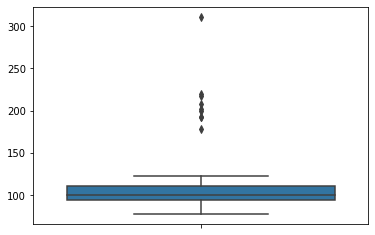

In [ ]:
# Import a biblioteca seaborn:
import seaborn as sns
sns.boxplot(y = a_numeros1_copia)

Consegue identificar os outliers do array?

## Objetivo
> Substituir os outliers por mediana. 

* Como fazer isso?

### Siga os passos a seguir
1. Calcule estatísticas descritivas antes das transformações par avaliar o impacto;
    * Calcule média, mediana e desvio-padrão dos dados originais;
2. Calcule os valores a seguir:
    * Q1, Q3
    * IQR = Q3-Q1
    * lim_inferior = Q1-1.5\*IQR
    * lim_superior = Q3+1.5\*IQR
3. Proceda à substituição:
    * Se a_numeros1_copia[i] < lim_inferior então a_numeros1_copia[i]= Mediana
    * Se a_numeros1_copia[i] > lim_superior então a_numeros1_copia[i]= Mediana
4. Calcule as estatísticas descritivas após as substituições e compare com os valores antes das transformações.

### Minha solução


1. Estatísticas Descritivas antes das transformações:

In [ ]:
# Algumas estatísticas descritivas:
f'Média: {np.mean(a_numeros1_copia)}; Mediana: {np.median(a_numeros1_copia)}; STD: {np.std(a_numeros1_copia)}'

Observe o quanto nossos dados estão distorcidos dos valores originalmente utilizados.

2. Calcular Q1, Q3 e IQR

In [ ]:
Q1= np.percentile(a_numeros1_copia, q = [25])
Q3= np.percentile(a_numeros1_copia, q = [75])
Q2= np.percentile(a_numeros1_copia, q = [50])
IQR = Q3-Q1
lim_inferior = Q1-1.5*IQR
lim_superior = Q3+1.5*IQR

In [ ]:
f'Q1: {Q1}; Q3: {Q3}; lim_inferior: {lim_inferior}; lim_superior: {lim_superior}'

3. Substituir
* Se a_numeros1[i] < lim_inferior então a_numeros1[i]= Mediana
* Se a_numeros1[i] > Lia_Sup então a_numeros1[i]= Mediana

In [ ]:
a_numeros2 = a_numeros1_copia.copy()

In [ ]:
a_numeros2[a_numeros2 < lim_inferior[0]] = Q2[0]
a_numeros2[a_numeros2 > lim_superior[0]] = Q2[0]
a_numeros2

4. Estatísticas Descritivas para avaliarmos o impacto:

In [ ]:
# Algumas estatísticas descritivas:
f'Média: {np.mean(a_numeros2)}; Mediana: {np.median(a_numeros2)}; STD: {np.std(a_numeros2)}'

In [ ]:
# Import a biblioteca seaborn:
import seaborn as sns
sns.boxplot(y = a_numeros2)

Como podem ver, os outliers desapareceram, como queríamos.

___
# **Valores únicos**
> Considere o array a seguir:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.randint(0, 100, 100)
a_numeros1

Quem são os valores únicos do array?

In [ ]:
np.unique(a_numeros1)

___
# **Diferença entre dois arrays**
> O resultado é um array com os **valores únicos de A que não estão em B**. Na teoria de conjuntos escrevemos $A - B = A - A \cap B$.

![Difference](https://github.com/MathMachado/Materials/blob/master/set_Difference.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)


* Vamos ver como isso funciona na prática:

## Exemplo 1

In [ ]:
a_numeros1 = np.array([0, 1, 2, 4, 5, 7, 8, 8]) # array de valores que serão excluidos em a_numeros1. Observe que '3' não pertence a a_numeros1.
a_numeros2 = np.array([1, 6, 7, 3])

In [ ]:
np.setdiff1d(a_numeros1, a_numeros2)

Observe que o resultado são os elementos de a_numeros1 que não pertencem a x_Y. Mas como fica o '3' nesta história?

## Exemplo 2

In [ ]:
a_numeros1 = np.arange(10)
a_numeros1

In [ ]:
a_numeros2 = np.array([1, 5, 7])
a_numeros2

In [ ]:
np.setdiff1d(a_numeros1, a_numeros2)

Observe que os elementos de a_numeros2 foram deletados de a_numeros1. Ok?

___
# Diferença Simétrica
* Em teoria de conjuntos, chamamos de Diferença Simétrica e escrevemos $(A \cup B)- (A \cap B)$.

![DifferenceSymetric](https://github.com/MathMachado/Materials/blob/master/set_DifferenceSymetric.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)

* Vamos ver como isso funciona na prática:

In [ ]:
import numpy as np
a_numeros1 = np.array([0, 1, 2, 4, 5, 7, 8]) # Observe que [1, 4, 7] pertencem a a_numeros1, mas 3, não. Portanto:
a_numeros2 = np.array([1, 4, 7, 3])

In [ ]:
np.setxor1d(a_numeros1, a_numeros2)

Como explicamos ou interpretamos este resultado?

___
# **União de dois arrays**
> Retorna os valores **únicos** dos dois arrays. Na teoria dos conjuntos, escrevemos:

$$A \cup B$$

![Union](https://github.com/MathMachado/Materials/blob/master/set_Union.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)

In [ ]:
a_numeros1 = np.array([0, 1, 2, 4, 5, 7, 8, 8])

# Observe que [1, 4, 7] pertencem a a_numeros1, mas 3, não. Portanto:
a_numeros2 = np.array([1, 4, 7, 3])

In [ ]:
np.union1d(a_numeros1, a_numeros2)

___
# **Selecionar itens comuns dos arrays X e Y**
* Na teoria de conjuntos, chamamos de intersecção e escrevemos $X \cap Y$.

![Intersection](https://github.com/MathMachado/Materials/blob/master/set_Intersection.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)

* Considere os arrays a seguir:

In [ ]:
a_numeros1 = np.arange(10)
a_numeros1

In [ ]:
a_numeros2 = np.arange(8, 18)
a_numeros2

Quais são os elementos comuns à X e Y?

In [ ]:
np.intersect1d(a_numeros1, a_numeros2)

___
# **Autovalores e Autovetores**
> Autovetor e Autovalor são um dos tópicos mais importantes em Machine Learning.

Por definição, o escalar $\lambda$ e o vetor $v$ são autovalor e autovetor da matriz $A$ se

$$Av = \lambda v$$

## Leitura Adicional:

* [Machine Learning & Linear Algebra — Eigenvalue and eigenvector](https://medium.com/@jonathan_hui/machine-learning-linear-algebra-eigenvalue-and-eigenvector-f8d0493564c9)

* O array a_numeros2 tem a seguinte forma:

In [ ]:
a_numeros2

In [ ]:
# Calcula autovalores e autovetores:
a_Autovalores, a_Autovetores= np.linalg.eig(a_numeros2)

Os autovalores do array a_numeros2 são:

In [ ]:
a_Autovalores

Os autovetores do array a_numeros2 são:

In [ ]:
a_Autovetores

___
# **Encontrar Missing Values (NaN)**

## Gerar o exemplo

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.random.random(100)

# Inserindo 15 NaN's no array:
np.random.seed(20111974)
l_indices_aleatorios= np.random.randint(0, 100, size = 15)

for i_indices in l_indices_aleatorios:
    #print(i_indices)
    a_numeros1[i_indices] = np.nan

In [ ]:
a_numeros1

Ok, inserimos aleatoriamente 14 NaN's no array a_numeros1. Agora, vamos contar quantos NaN's (já sabemos a resposta!).

## Identificar os NaN's

In [ ]:
np.isnan(a_numeros1).sum()

Ok, temos 14 NaN's em a_numeros1.

Ok, agora eu quero saber os índices desses NaN's.

In [ ]:
i_indices= np.where(np.isnan(a_numeros1))
i_indices

In [ ]:
# Checando...
a_numeros1[2]

Vamos conferir se está correto? Para isso, basta comparar com l_indices_aleatorios:

___
# **Deletar NaN's de um array**
> Considere o mesmo array que acabamos de trabalhar. Agora eu quero excluir os NaN's identificados.

In [ ]:
a_numeros1

In [ ]:
a_numeros1[~np.isnan(a_numeros1)]

Observe que os NaN's foram excluidos.

___
# **Converter lista em array**
> Considere a lista a seguir:

In [ ]:
l_Lista = [np.random.randint(0, 10, 10)]
l_Lista

In [ ]:
type(l_Lista)

Convertendo a minha lista para array:

In [ ]:
a_numeros = np.asarray(l_Lista)
a_numeros

In [ ]:
type(a_numeros)

___
# Converter tupla em array
> Considere a tupla a seguir:

In [ ]:
np.random.seed(20111974)
t_numeros = ([np.random.randint(0, 10, 3)], [np.random.randint(0, 10, 3)], [np.random.randint(0, 10, 3)])
t_numeros

In [ ]:
type(t_numeros)

In [ ]:
a_numeros = np.asarray(t_numeros)
a_numeros

In [ ]:
type(a_numeros)

___
# Acrescentar elementos à um array
> Considere o array a seguir:

In [ ]:
a_numeros1 = np.arange(5)
a_numeros1

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.append(a_numeros1, [np.random.randint(0, 10, 3), np.random.randint(0, 10, 3), np.random.randint(0, 10, 3)])
a_numeros1

___
# **Converter array 1D num array 2D**
> Considere os arrays a seguir:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(0, 10, 6))

np.random.seed(19741120)
a_numeros2 = np.array(np.random.randint(0, 10, 6))

In [ ]:
a_numeros1

In [ ]:
a_numeros2

In [ ]:
np.column_stack((a_numeros1, a_numeros2)) # Atenção aos parênteses em (a_numeros1, a_numeros2).

___
# **Excluir um elemento específico do array usando indices**
> Considere os arrays a seguir:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(0, 10, 6))
a_numeros1

Suponha que eu queira excluir os valores '8' de a_numeros1. Os índices dos valores '8' são: [0, 1, 3]. Portanto, temos:

In [ ]:
a_numeros1 = np.delete(a_numeros1, [0, 1, 3])
a_numeros1

___
# **Frequência dos valores únicos de um array**
> Considere o array a seguir:

In [ ]:
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(0, 10, 100))
a_numeros1

Suponha que eu queira saber quantas vezes o número/elemento '2' aparece em a_numeros1.

In [ ]:
l_itens_unicos, i_count = np.unique(a_numeros1, return_counts=True)
l_itens_unicos

O que significa o output acima?

In [ ]:
i_count

Qual a interpretação do output acima?

In [ ]:
np.asarray((l_itens_unicos, i_count))

Qual a interpretação do output acima?

___
# **Combinações possíveis de outros arrays**
> Considere o exemplo a seguir:


In [ ]:
a_numeros1 = [2, 4, 6]
a_numeros2 = [0, 8]
a_numeros4 = [1, 5]

In [ ]:
np.meshgrid(a_numeros1, a_numeros2, a_numeros4)

In [ ]:
np.array(np.meshgrid(a_numeros1, a_numeros2, a_numeros4))

In [ ]:
np.array(np.meshgrid(a_numeros1, a_numeros2, a_numeros4)).T

In [ ]:
# Resultado final
a_numeros3 = np.array(np.meshgrid(a_numeros1, a_numeros2, a_numeros4)).T.reshape(-1,3)
a_numeros3

___
# **Wrap Up**

___
# **Exercícios**

## Exercício 1 - Selecionar os números pares
> Dado o 1D array abaixo, selecionar somente os números pares.

In [ ]:
a_numeros1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a_numeros1

### **Minha solução**

In [ ]:
a_numeros1[a_numeros1 % 2 == 0]

___
## Exercício 2 - Substituir pela mediana
> Dado o array 1D abaixo, substituir os números pares pela mediana de a_numeros1.

In [ ]:
a_numeros1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a_numeros1

### **Minha solução**
* Primeiramente, precisamos calcular a mediana.
* Depois, substituimos os valores pares de a_numeros1 pela mediana encontrada anteriormente. Ok?

In [ ]:
a_numeros1[a_numeros1 % 2 == 0] = np.median(a_numeros1)
a_numeros1

Verificando...

In [ ]:
f'A média de a_numeros1 é: {np.median(a_numeros1)}'

___
## Exercício 3 - Reshape
> Dado o array 1D abaixo, reshape para um array 2D com 3 colunas.

In [ ]:
# Define seed
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(1, 10, size = 15))
a_numeros1

### **Minha solução**
* O array 1D a_numeros1 acima possui 15 elementos. Como queremos transformá-lo num array 2D com 3 colunas, então cada coluna terá 5 elementos.

In [ ]:
a_numeros1.reshape(5, 3) 
# Poderia ser a_numeros1.reshape(-1, 3), onde "-1" pede para o NumPy calcular o número de linhas. 

___
## Exercício 4 - Reshape
> Dado o array 1D abaixo, reshape para um array 3D com 2 colunas.

In [ ]:
# Define seed
np.random.seed(20111974)
a_numeros1 = np.array(np.random.randint(1, 10, size = 16))
a_numeros1

### **Minha solução**
* O array 1D a_numeros1 acima possui 16 elementos. Queremos transformá-lo num array 3D com 2 colunas.

In [ ]:
a_numeros1.reshape(-1, 2) # O valor "-1" na posição das linhas pede ao NumPy para calcular o número de linhas automaticamente.

## Exercício 5
Para mais exercícios envolvendo arrays, visite a página [Python: Array Exercises, Practice, Solution](https://www.w3resource.com/python-exercises/array/).

## Exercício 6
Para mais exercícios envolvendo matemática, viste a página [Python Math: - Exercises, Practice, Solution](https://www.w3resource.com/python-exercises/math/index.php).

## Exercício 7
Para mais exercícios envolvendo NumPy em geral, visite a página [NumPy Exercises, Practice, Solution](https://www.w3resource.com/python-exercises/numpy/index.php).

## Exercício 8
